group           0.145374
meancong1       0.076468
menincong       0.197591
reactiontime    0.160367
truecong       -0.389480
trueincong     -0.311904
totaltrue      -0.378547
falsincong      0.327061
falsecong       0.172779
totalfalse      0.305820
CorrectM1      -0.061406
RT1match1       0.093444
CorrectNonM1   -0.003566
RT1non1        -0.051845
CorrectM0      -0.058241
RT1match0       0.081902
CorrectNonM0    0.103783
RT1nonmat0      0.108030
CDT                  NaN
ACEtotal        1.000000
Name: ACEtotal, dtype: float64


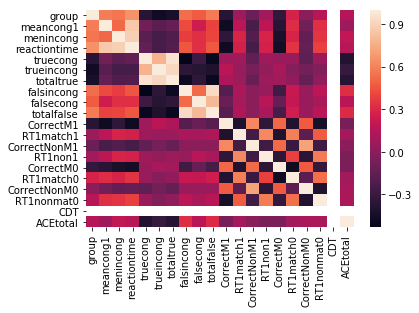

In [10]:
import seaborn as sns
import pandas as pd

missing_value=["?", " "]
data1= pd.read_csv("pencile.csv",na_values=missing_value, delimiter=",")
data= pd.read_csv("computerized.csv",na_values=missing_value, delimiter=",")
data['ACEtotal'] = data1['ACEtotal']
Var_Corr = data.corr()

# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns)
print(Var_Corr['ACEtotal'])

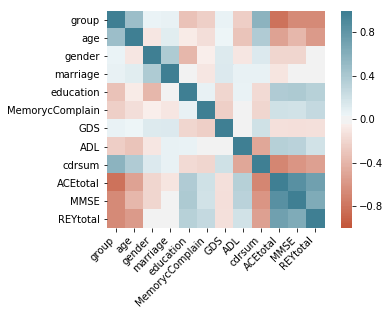

In [18]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [19]:
corr.style.background_gradient(cmap='coolwarm')

,group,age,gender,marriage,education,MemorycComplain,GDS,ADL,cdrsum,ACEtotal,MMSE,REYtotal
group,1,0.481,0.0550361,0.0735292,-0.31294,-0.239111,0.0694255,-0.249057,0.574378,-0.80693,-0.656768,-0.658262
age,0.481,1,-0.0950861,0.116023,-0.0641087,-0.14236,0.0447695,-0.298605,0.369539,-0.512511,-0.386622,-0.559754
gender,0.0550361,-0.0950861,1,0.380624,-0.381298,-0.0397197,0.124661,-0.0941845,0.135774,-0.201158,-0.194415,-0.0338694
marriage,0.0735292,0.116023,0.380624,1,-0.0328952,-0.0926996,0.138445,0.077892,0.0771653,-0.104347,0.0301822,0.0109125
education,-0.31294,-0.0641087,-0.381298,-0.0328952,1,0.0708907,-0.194922,0.0647971,-0.160381,0.369336,0.396804,0.329816
MemorycComplain,-0.239111,-0.14236,-0.0397197,-0.0926996,0.0708907,1,-0.230317,0.00493776,-0.195568,0.20244,0.189348,0.259513
GDS,0.0694255,0.0447695,0.124661,0.138445,-0.194922,-0.230317,1,-0.00832259,0.210703,-0.130045,-0.140158,-0.119098
ADL,-0.249057,-0.298605,-0.0941845,0.077892,0.0647971,0.00493776,-0.00832259,1,-0.482364,0.343396,0.322223,0.18793
cdrsum,0.574378,0.369539,0.135774,0.0771653,-0.160381,-0.195568,0.210703,-0.482364,1,-0.685756,-0.59757,-0.520752
ACEtotal,-0.80693,-0.512511,-0.201158,-0.104347,0.369336,0.20244,-0.130045,0.343396,-0.685756,1,0.853062,0.719396
